<a href="https://colab.research.google.com/github/nehapatel0810/PRODIGY_ML_03/blob/main/task_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
# Task-3
# Implement a support vector machine (SVM) to classify images of cats and dogs from the Kaggle dataset.

In [29]:
# Import Libraries
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from google.colab import files
import zipfile

In [30]:
from google.colab import files
uploaded = files.upload()  # Upload train.zip

Saving train.zip to train (1).zip


In [31]:
with zipfile.ZipFile("train.zip", 'r') as zip_ref:
    zip_ref.extractall("/content")

In [32]:
# Set data path
data_dir = "/content/train"  # contains 'cats' and 'dogs' folders
IMG_SIZE = 64
limit = 1000

X = []
y = []
cat_count = 0
dog_count = 0

In [33]:
# Load images
for label_folder in os.listdir(data_dir):
    folder_path = os.path.join(data_dir, label_folder)
    if not os.path.isdir(folder_path):
        continue

    for file in os.listdir(folder_path):
        if not file.endswith(".jpg"):
            continue

        if label_folder == "cats" and cat_count < limit:
            label = 0
            cat_count += 1
        elif label_folder == "dogs" and dog_count < limit:
            label = 1
            dog_count += 1
        else:
            continue

        img_path = os.path.join(folder_path, file)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

        if img is None:
            continue

        img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
        X.append(img.flatten())
        y.append(label)

        if cat_count >= limit and dog_count >= limit:
            break

X = np.array(X)
y = np.array(y, dtype=np.int32)
print(f"✅ Loaded {len(X)} images — {cat_count} Cats, {dog_count} Dogs")


✅ Loaded 2000 images — 1000 Cats, 1000 Dogs


In [34]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train SVM
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

# Evaluate
y_pred = svm.predict(X_test)

print("🎯 Accuracy:", accuracy_score(y_test, y_pred))
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred, target_names=["Cat", "Dog"]))


🎯 Accuracy: 0.5525

📊 Classification Report:
               precision    recall  f1-score   support

         Cat       0.54      0.68      0.60       199
         Dog       0.57      0.42      0.49       201

    accuracy                           0.55       400
   macro avg       0.56      0.55      0.55       400
weighted avg       0.56      0.55      0.54       400



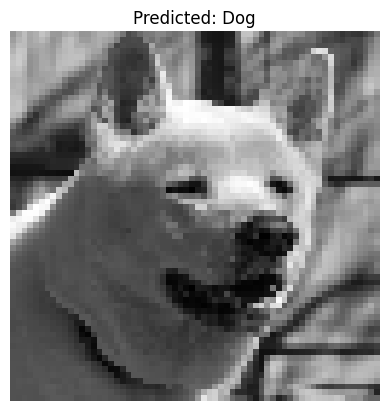

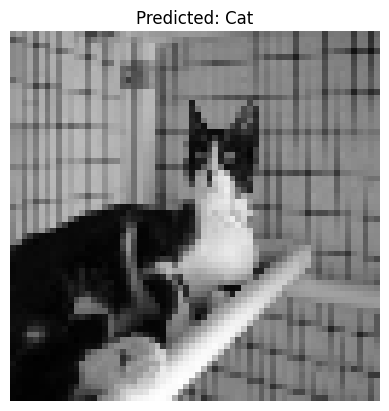

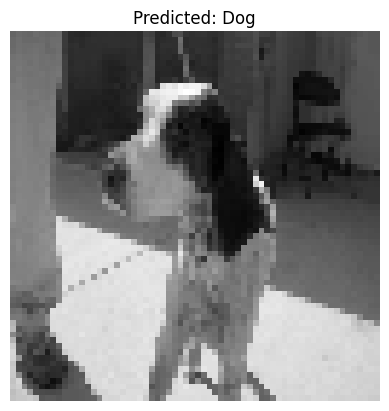

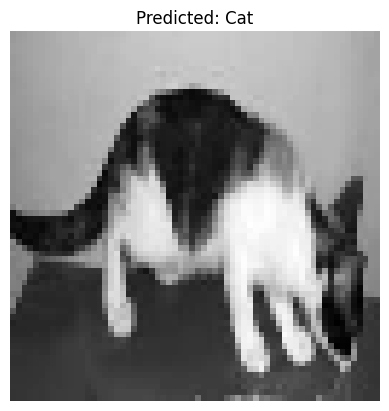

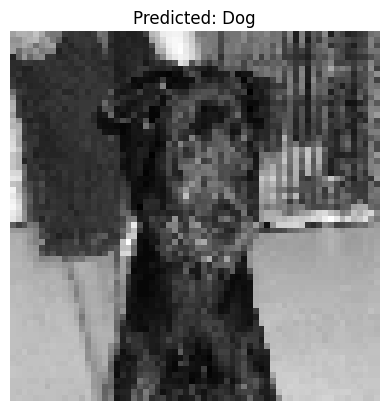

In [35]:
# Show 5 predictions
for i in range(5):
    img = X_test[i].reshape(IMG_SIZE, IMG_SIZE)
    plt.imshow(img, cmap='gray')
    plt.title("Predicted: " + ("Dog" if y_pred[i] else "Cat"))
    plt.axis('off')
    plt.show()
